# 신경망 구성

In [2]:
pip install tensorflow

  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30702 sha256=5b260f61db9bef5363df982bfa1055b6d156324c1fcdcf32604a8a5d5b25251d
  Stored in directory: c:\users\jjun8\appdata\local\pip\cache\wheels\f1\60\77\22b9b5887bd47801796a856f47650d9789c74dc3161a26d608
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=088b882f42e647956c21482522033526159b06c3faffc6d528813022b9d035f4
  Stored in directory: c:\users\jjun8\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built clang termcolor
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0
Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

### MNIST review

In [2]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

# 모델에 맞게 데이터 가공
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_reshaped = x_train_norm.reshape(-1, x_train_norm.shape[1]*x_train_norm.shape[2])
x_test_reshaped = x_test_norm.reshape(-1, x_test_norm.shape[1]*x_test_norm.shape[2])

# 딥러닝 모델 구성 - 2 Layer Perceptron
model=keras.models.Sequential()
model.add(keras.layers.Dense(50, activation='sigmoid', input_shape=(784,)))  # 입력층 d=784, 은닉층 레이어 H=50
model.add(keras.layers.Dense(10, activation='softmax'))   # 출력층 레이어 K=10
model.summary()

# 모델 구성과 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_reshaped, y_train, epochs=10)

# 모델 테스트 결과
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

11501568/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 1s 629us/step - loss: 0.4910 - accuracy: 0.8804
Epoch 2/10
1875/1875 [==============================] - 1s 614us/step - loss: 0.2291 - accuracy: 0.9346
Epoch 3/10
1875/1875 [==============================] - 1s 617us/step - loss: 0.1765 - accuracy: 0.9497
Epoch 4/10
1875/1875 [==============================] - 1s 623us/step - loss: 0.1454 - accuracy: 0.9586
Epoch 5/10
1875/1875 [===========

### (1) 개요

- 다층 퍼셉트론

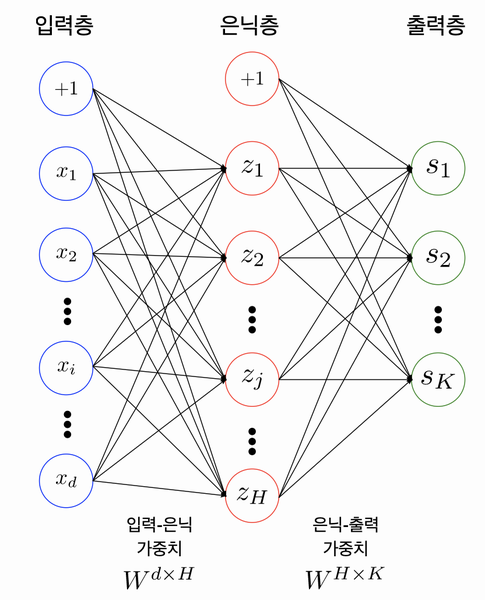

- Parameters / Weights

There is a matrix between input layer, hidden layer and hidden layer, output layer.   
For example, If there are 100 input values and 20 of hidden nodes, There is a 100x20 matrix between input, hidden layer.   
We call this matrix a parameter or weight.

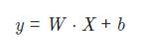

In [3]:
# 입력층 데이터의 모양(shape)
print(x_train_reshaped.shape)

# 테스트를 위해 x_train_reshaped의 앞 5개의 데이터를 가져온다.
X = x_train_reshaped[:5]
print(X.shape)

(60000, 784)
(5, 784)


In [4]:
weight_init_std = 0.1
input_size = 784
hidden_size=50

# 인접 레이어간 관계를 나타내는 파라미터 W를 생성하고 random 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)  
# 바이어스 파라미터 b를 생성하고 Zero로 초기화
b1 = np.zeros(hidden_size)

a1 = np.dot(X, W1) + b1   # 은닉층 출력

print(W1.shape)
print(b1.shape)
print(a1.shape)

(784, 50)
(50,)
(5, 50)


In [5]:
# 첫 번째 데이터의 은닉층 출력을 확인해 보면 차원이 50인 것을 확인할 수 있다.
a1[0]

array([ 4.54082623e-02, -4.76829496e-01, -6.00181884e-01,  2.75292492e-01,
        1.28011000e+00, -2.58220973e-01, -4.88214936e-01, -3.94077687e-01,
        5.83590645e-01, -3.21794633e+00,  2.64670506e+00, -1.98046976e+00,
       -8.56832461e-01, -1.09136286e+00, -4.63027627e-01, -1.57721646e+00,
        6.38550265e-01, -9.36808758e-01, -5.49485443e-01,  1.24152929e+00,
       -1.21576557e+00,  1.43908500e+00, -1.09894084e+00, -9.02161619e-01,
       -1.21824307e+00,  1.23042237e+00,  1.97550710e-02,  1.77516755e+00,
       -4.37113274e-01,  1.80996713e+00, -4.83919109e-02,  8.75829021e-01,
        9.66040926e-01,  4.70274307e-01,  1.26803599e+00,  1.37781694e+00,
       -7.00765612e-01, -8.98196864e-01,  1.08422748e+00,  5.81605298e-02,
        1.20232181e+00, -1.20856459e+00,  1.61996149e+00, -1.25765402e+00,
        7.10330993e-01, -1.23365400e+00,  9.28052244e-01,  4.98881581e-01,
        1.31356810e-03,  4.28123683e-02])

### (2) Activation function and Loss function

#### Activation functions

- Activation function usually use nonlinear functions.

1. Sigmoid
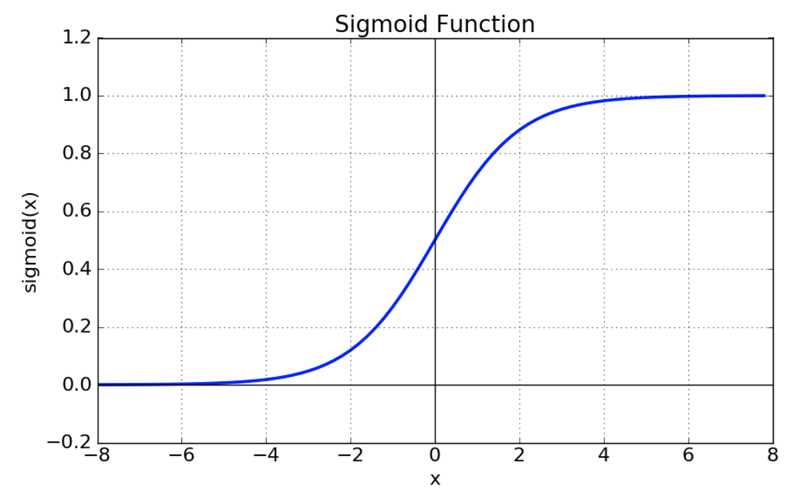
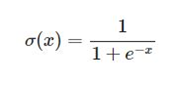

In [6]:
#Sigmoid implementation
def sigmoid(x):
    return 1/ (1 + np.exp(-x))

z1 = sigmoid(a1)
print(z1[0])

[0.51135012 0.38300107 0.35430208 0.56839174 0.7824685  0.43580108
 0.38031417 0.40273607 0.64189319 0.03849593 0.93380762 0.12126877
 0.29800156 0.25136173 0.38626783 0.17119006 0.65442567 0.28154541
 0.3659838  0.7758301  0.22868249 0.80831292 0.2499384  0.28860649
 0.22824579 0.77389249 0.50493861 0.85509913 0.39242903 0.8593579
 0.48790438 0.70595715 0.72432967 0.61544868 0.78040636 0.79864016
 0.3316425  0.28942118 0.74729316 0.51453604 0.76893756 0.22995513
 0.83478982 0.221378   0.67047429 0.22554253 0.71667996 0.62219646
 0.50032839 0.51070146]


2. tanh
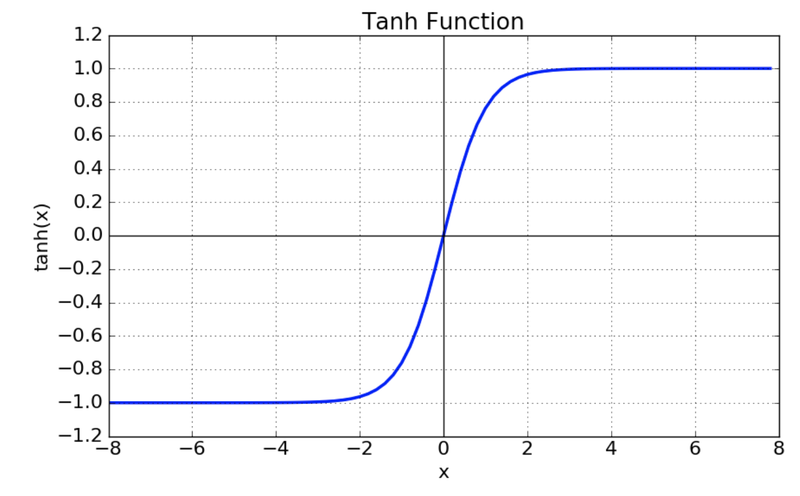
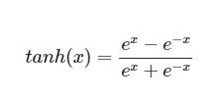

3. ReLU

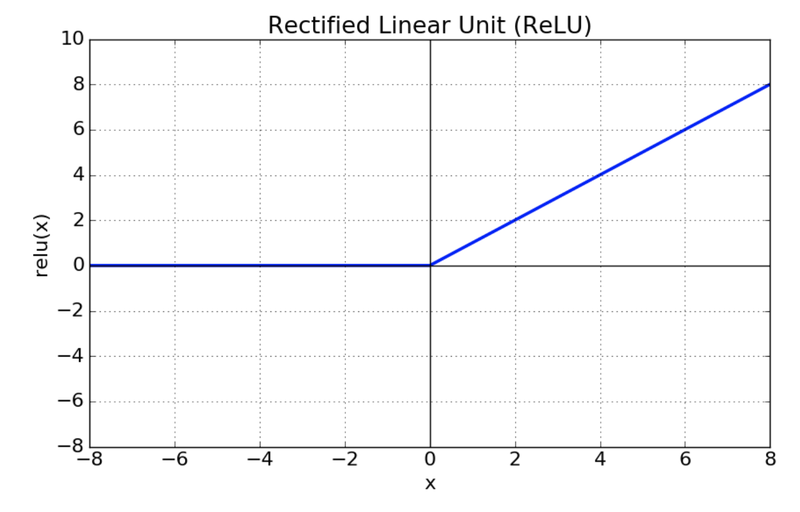
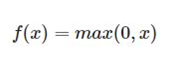

- Sigmoid 다음에 다시 Dense 레이어 출현

In [7]:
def affine_layer_forward(X,W,b):
    y = np.dot(X,W) + b
    cache = (X,W,b)
    return y, cache

In [8]:
input_size = 784
hidden_size = 50
output_size = 10

W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)    # z1이 다시 두번째 레이어의 입력이 된다. 

print(a2[0])  # 최종 출력이 output_size만큼의 벡터가 되었다.

[-0.18984515  0.11078663  0.01255755 -0.16607961  0.44559856 -0.0930743
 -0.03644042  0.34800709  0.29527711 -0.80383228]


- 최종 출력층 softmax

In [11]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x,axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T
    x = x-np.max(x)
    return np.exp(x)/np.sum(np.exp(x))

In [13]:
y_hat = softmax(a2)
y_hat[0]    #10 개의 숫자 중 하나일 확률이 되었다.

array([0.07916243, 0.10692564, 0.09692181, 0.0810663 , 0.14944756,
       0.08720596, 0.0922873 , 0.13555183, 0.12858936, 0.04284182])

#### Loss functions

- Mean Square Error
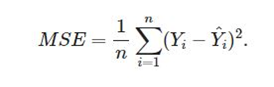

- Cross Entropy
두 확률분포 사이의 유사도가 클수록 작아지는 값이다.
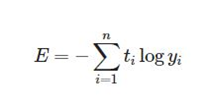


In [14]:
# 정답 라벨을 One-hot 인코딩하는 함수
def _change_one_hot_label(X, num_category):
    T = np.zeros((X.size, num_category))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T

Y_digit = y_train[:5]
t = _change_one_hot_label(Y_digit, 10)
t     # 정답 라벨의 One-hot 인코딩

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [16]:
print(y_hat[0])
print(t[0])

[0.07916243 0.10692564 0.09692181 0.0810663  0.14944756 0.08720596
 0.0922873  0.13555183 0.12858936 0.04284182]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [15]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

Loss = cross_entropy_error(y_hat, t)
Loss

2.470517572366624

### Gradient Dscendant

- 오차를 구했으면 이제 오차를 줄이는 것이 목표이다.   
   
산을 내려간다고 생각하면 된다. 하지만 산을 내려갈 때 너무 크게 발걸음을 내딛는다면 다른 골짜기에 빠질 수도 있다.   
   
그래서 우리는 학습률이라는 개념을 도입해 기울기 값과 이 학습률을 곱한 만큼만 발걸음을 내딛을 것이다.

In [17]:
batch_num = y_hat.shape[0]
dy = (y_hat - t) / batch_num
dy    # softmax값의 출력으로 Loss를 미분한 값

array([[ 0.01583249,  0.02138513,  0.01938436,  0.01621326,  0.02988951,
        -0.18255881,  0.01845746,  0.02711037,  0.02571787,  0.00856836],
       [-0.18385007,  0.02771349,  0.02079815,  0.01315474,  0.02824231,
         0.01550651,  0.0192793 ,  0.02875388,  0.02281132,  0.00759037],
       [ 0.01891259,  0.02292057,  0.01774874,  0.01669389, -0.17811462,
         0.01626828,  0.02094774,  0.02887802,  0.02265773,  0.01308705],
       [ 0.01933331, -0.17947408,  0.01879308,  0.01500028,  0.0247753 ,
         0.01851421,  0.02107692,  0.02762373,  0.0226589 ,  0.01169835],
       [ 0.0200468 ,  0.02533052,  0.01694039,  0.01828725,  0.02268283,
         0.01626881,  0.01873921,  0.03125502,  0.01952759, -0.18907842]])

- dy가 구해지면 다른 기울기들은 chain rule로 쉽게 구해진다.

In [18]:
dW2 = np.dot(z1.T, dy)    
dW2

array([[-9.56095622e-02, -1.40613958e-02,  5.89848858e-02,
         4.99586219e-02, -1.84929674e-02, -7.74699323e-02,
         6.12589401e-02,  9.08239058e-02,  7.08343791e-02,
        -1.26226875e-01],
       [-7.41136802e-02, -3.91537867e-02,  4.93513779e-02,
         4.05424750e-02, -4.68792722e-03, -1.09897758e-01,
         5.06908601e-02,  7.37057404e-02,  6.00852013e-02,
        -4.65225028e-02],
       [-8.46833536e-02, -2.06739643e-02,  5.57922433e-02,
         4.70930635e-02, -6.19656271e-02, -6.05170601e-02,
         5.85354082e-02,  8.56382082e-02,  6.73342719e-02,
        -8.65531900e-02],
       [-4.01273417e-02, -3.81734801e-03,  5.02938683e-02,
         4.31477674e-02, -4.78574758e-02, -1.18242400e-01,
         5.24253275e-02,  7.68768709e-02,  6.18398477e-02,
        -7.45391168e-02],
       [-1.00731410e-02, -3.19916121e-02,  2.96163397e-02,
         2.62462772e-02, -8.42883920e-02,  6.71480496e-03,
         3.26142033e-02,  4.69708216e-02,  3.59500953e-02,
        -5.

In [19]:
dW2 = np.dot(z1.T, dy)
db2 = np.sum(dy, axis=0)

- 중간에 sigmoid가 있었으므로, 이 활성화 함수에 대한 gradient도 고려되어야 한다.

In [20]:
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

In [21]:
dz1 = np.dot(dy, W2.T)
da1 = sigmoid_grad(a1) * dz1
dW1 = np.dot(X.T, da1)
db1 = np.sum(dz1, axis=0)

In [22]:
learning_rate = 0.1

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    return W1, b1, W2, b2

### Back Propagation

- Loss function 을 통해 오차를 구하고 각 파라미터들을 조정하는 gradient descendatnt에 대해 알게 되었다. 이제 이 기울기를 입력층까지 전달하며 파라미터들을 조정하는데, 이것이 back propagation 이다.

In [23]:
'''
def affine_layer_forward(X,W,b):
    y = np.dot(X,W) + b
    cache = (X,W,b)
    return y, cache
'''

def affine_layer_backward(dy, cache):
    X, W, b = cache
    dX = np.dot(dy, W.T)
    dW = np.dot(X.T, dy)
    db = np.sum(dy, axis=0)
    return dX, dW, db

#### Forward propagation 과 Backward propagation 이 이루어지는 한 사이클을 정리해보자면,

In [24]:
# 파라미터 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

# Forward Propagation
a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)

# 추론과 오차(Loss) 계산
y_hat = softmax(a2)
t = _change_one_hot_label(Y_digit, 10)   # 정답 One-hot 인코딩
Loss = cross_entropy_error(y_hat, t)

print(y_hat)
print(t)
print('Loss: ', Loss)
        
dy = (y_hat - t) / X.shape[0]
dz1, dW2, db2 = affine_layer_backward(dy, cache2)
da1 = sigmoid_grad(a1) * dz1
dX, dW1, db1 = affine_layer_backward(da1, cache1)

# 경사하강법을 통한 파라미터 업데이트    
learning_rate = 0.1
W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

[[0.09485833 0.07375996 0.10757326 0.0685495  0.07774231 0.10365703
  0.11879437 0.05588963 0.10860895 0.19056665]
 [0.07841497 0.07447994 0.11144563 0.07624062 0.10590902 0.0947417
  0.13983989 0.05991745 0.08967228 0.16933851]
 [0.11177624 0.08010971 0.11172279 0.07292509 0.09338862 0.10277078
  0.09734985 0.06447126 0.09736344 0.16812221]
 [0.09004746 0.06832046 0.10139843 0.06506988 0.10636875 0.0919921
  0.12179427 0.09339726 0.08824719 0.17336419]
 [0.08730046 0.0689074  0.10506451 0.07369237 0.11966003 0.09352015
  0.14085453 0.06071551 0.07848126 0.17180379]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.3256684106655516


### Model training

In [25]:
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

def train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=False):
    a1, cache1 = affine_layer_forward(X, W1, b1)
    z1 = sigmoid(a1)
    a2, cache2 = affine_layer_forward(z1, W2, b2)
    y_hat = softmax(a2)
    t = _change_one_hot_label(Y, 10)
    Loss = cross_entropy_error(y_hat, t)

    if verbose:
        print('---------')
        print(y_hat)
        print(t)
        print('Loss: ', Loss)
        
    dy = (y_hat - t) / X.shape[0]
    dz1, dW2, db2 = affine_layer_backward(dy, cache2)
    da1 = sigmoid_grad(a1) * dz1
    dX, dW1, db1 = affine_layer_backward(da1, cache1)
    
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    
    return W1, b1, W2, b2, Loss

In [26]:
X = x_train_reshaped[:5]
Y = y_train[:5]

# train_step을 다섯 번 반복 돌립니다.
for i in range(5):
    W1, b1, W2, b2, _ = train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=True)

---------
[[0.05306916 0.16887151 0.10030887 0.06827921 0.08842774 0.14117536
  0.06665088 0.10013293 0.13807394 0.07501041]
 [0.04768824 0.19406684 0.10785875 0.06043956 0.08048217 0.13929821
  0.06114127 0.13115636 0.1071544  0.07071421]
 [0.06492425 0.18824924 0.11173085 0.06088169 0.05591346 0.13205579
  0.06688031 0.12002961 0.12249547 0.07683935]
 [0.0606766  0.14271611 0.09887626 0.06713267 0.07874709 0.1287696
  0.06898815 0.13759438 0.14387912 0.07262003]
 [0.04755572 0.15403494 0.09561774 0.05571049 0.09431872 0.13709035
  0.06930952 0.13503448 0.13996781 0.07136022]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.4943371242607633
---------
[[0.06696214 0.17495787 0.08530227 0.06247066 0.10359427 0.16256849
  0.05918051 0.08130238 0.11190011 0.0917613 ]
 [0.06369234 0.19968418 0.09223855 0.05569494 0.09502092 0.1558685
  0.05489703 0.10694664 0.08811

### Accuracy

In [30]:
def predict(W1, b1, W2, b2, X):
    a1 = np.dot(X, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y

In [31]:
# X = x_train[:100] 에 대해 모델 추론을 시도합니다. 
X = x_train_reshaped[:100]
Y = y_test[:100]
result = predict(W1, b1, W2, b2, X)
result[0]

array([0.11822435, 0.16792288, 0.04780601, 0.04120579, 0.14091015,
       0.21103686, 0.03612579, 0.04144796, 0.05704506, 0.13827514])

In [32]:
def accuracy(W1, b1, W2, b2, x, y):
    y_hat = predict(W1, b1, W2, b2, x)
    y_hat = np.argmax(y_hat, axis=1)

    accuracy = np.sum(y_hat == y) / float(x.shape[0])
    return accuracy

In [33]:
acc = accuracy(W1, b1, W2, b2, X, Y)

t = _change_one_hot_label(Y, 10)
print(result[0])
print(t[0])
print(acc)

[0.11822435 0.16792288 0.04780601 0.04120579 0.14091015 0.21103686
 0.03612579 0.04144796 0.05704506 0.13827514]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
0.08


- 학습을 통해 높아질 것이다.